Dataframes neste arquivo: Dicionário de dados, produtos, vendas
                 VARIÁVEL                                     DESCRIÇÃO  \
0                    DATA              Data em que a venda foi efetuada   
1           FAIXA_HORARIO  Faixa de horário em que a venda foi efetuada   
2              ID_PRODUTO         Chave única que identifica um produto   
3  PESO_MEDIO_UNITARIO_KG    Peso médio do produto medido em kilogramas   
4                PREÇO_KG                       Preço médio pago por kg   

   Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN   

                                    Unnamed: 6  
0                                          NaN  
1                                          NaN  
2                  

  0%|          | 0/9806 [00:00<?, ?it/s]

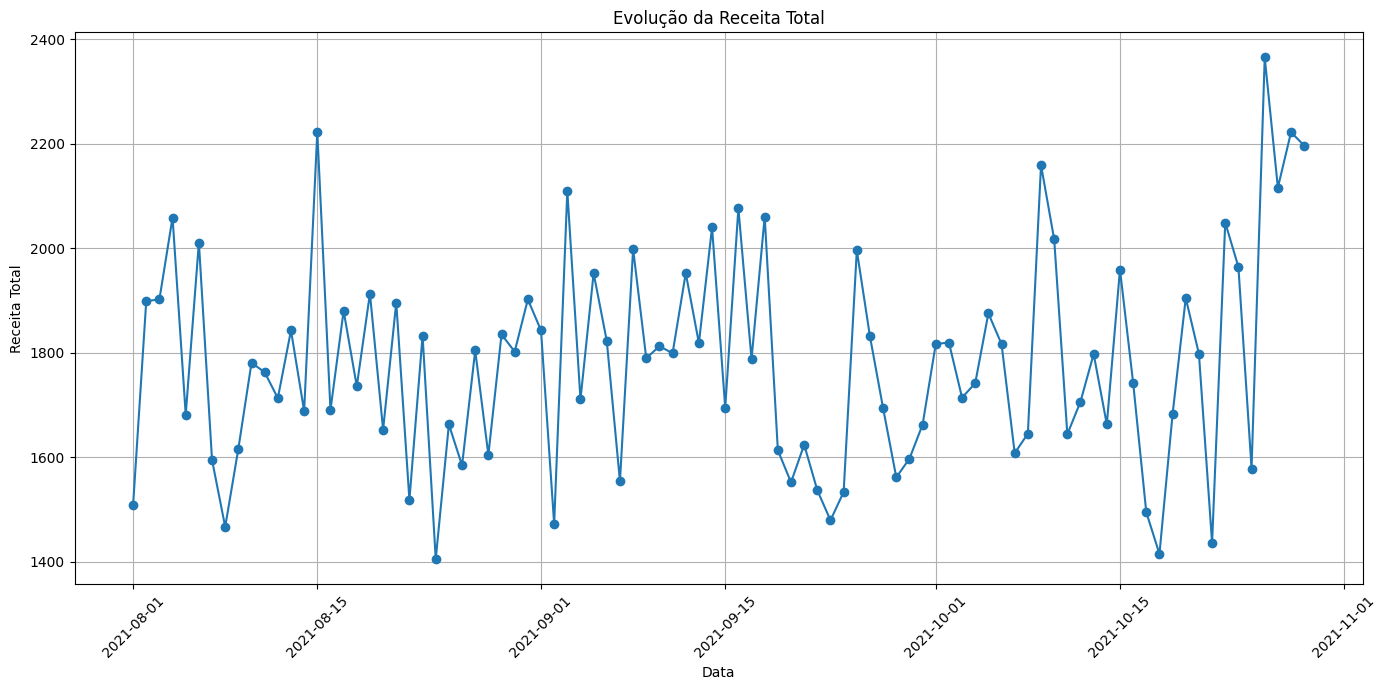

Melhor dia de vendas: 2021-10-26
Receita total nesse dia: 2365.344
Produto vendido em maior quantidade (kg): Laranja
Quantidade total vendida (kg): 8009.02
Dia em que foram vendidas mais bananas: 2021-10-28
Quantidade total de bananas vendidas nesse dia (kg): 60.901878914405


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê os dataframes do arquivo Excel
dataframes = pd.read_excel('Teste visualização de dados.xlsx', sheet_name=None)

# Adiciona a linha para definir o dataframe 'produtos_df'
produtos_df = dataframes['produtos']

# Imprime o nome de cada dataframe
print("Dataframes neste arquivo:", ", ".join(dataframes.keys()))

for k, v in dataframes.items():
    # Remove espaços em branco nos nomes das colunas
    try:
        v = v.rename(columns=lambda x: x.strip() if isinstance(x, str) else x)
    except:
        pass

    # Remove espaços em branco nos valores de strings nas células
    try:
        v = v.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
    except:
        pass

    dataframes[k] = v

    print(v.head())

# Analisa o dataframe 'vendas' para obter informações de receita
vendas_df = dataframes['vendas']

# Converte as colunas para os tipos apropriados
vendas_df['DATA'] = pd.to_datetime(vendas_df['DATA'], errors='coerce')
vendas_df['VALOR_VENDA'] = vendas_df['VALOR_VENDA'].progress_apply(pd.to_numeric, errors='coerce')

# Calcula a receita total por dia
receita_por_dia = vendas_df.groupby('DATA')['VALOR_VENDA'].sum().reset_index()

# Plota a receita geral ao longo do tempo
plt.figure(figsize=(14,7))
plt.plot(receita_por_dia['DATA'], receita_por_dia['VALOR_VENDA'], marker='o')
plt.title('Evolução da Receita Total')
plt.xlabel('Data')
plt.ylabel('Receita Total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Encontra o melhor dia de vendas
melhor_dia_vendas = receita_por_dia.loc[receita_por_dia['VALOR_VENDA'].idxmax()]
print('Melhor dia de vendas:', melhor_dia_vendas['DATA'].strftime('%Y-%m-%d'))
print('Receita total nesse dia:', melhor_dia_vendas['VALOR_VENDA'])

# Encontra o produto mais vendido por quantidade (kg)
vendas_produtos_df = vendas_df.merge(produtos_df, on='ID_PRODUTO')

vendas_produtos_df['TOTAL_KG'] = vendas_produtos_df['VALOR_VENDA'] / vendas_produtos_df['PREÇO_KG']

total_kg_por_produto = vendas_produtos_df.groupby('NOME_PRODUTO')['TOTAL_KG'].sum().reset_index()

produto_mais_vendido = total_kg_por_produto.loc[total_kg_por_produto['TOTAL_KG'].idxmax()]

print('Produto vendido em maior quantidade (kg):', produto_mais_vendido['NOME_PRODUTO'])
print('Quantidade total vendida (kg):', produto_mais_vendido['TOTAL_KG'])

# Encontra o dia em que foram vendidas mais bananas
bananas_df = vendas_produtos_df[vendas_produtos_df['NOME_PRODUTO'] == 'Banana']
vendas_bananas_por_dia = bananas_df.groupby('DATA')['TOTAL_KG'].sum().reset_index()

dia_mais_vendas_bananas = vendas_bananas_por_dia.loc[vendas_bananas_por_dia['TOTAL_KG'].idxmax()]

print('Dia em que foram vendidas mais bananas:', dia_mais_vendas_bananas['DATA'].strftime('%Y-%m-%d'))
print('Quantidade total de bananas vendidas nesse dia (kg):', dia_mais_vendas_bananas['TOTAL_KG'])
